In [100]:
from pylab import *
import numpy as np
import matplotlib.pyplot as plt
import csv
import scipy.io as io

In [101]:
data = io.loadmat('ex6data1.mat')
X = data['X']
Y = data['y']
train_set = [
    {"x": X[i][0], "y":X[i][1], "L":Y[i][0]}
    for i in range(51)
]
for train in train_set:
    print(train)

{'x': 1.9643, 'y': 4.5957, 'L': 1}
{'x': 2.2753, 'y': 3.8589, 'L': 1}
{'x': 2.9781, 'y': 4.5651, 'L': 1}
{'x': 2.932, 'y': 3.5519, 'L': 1}
{'x': 3.5772, 'y': 2.856, 'L': 1}
{'x': 4.015, 'y': 3.1937, 'L': 1}
{'x': 3.3814, 'y': 3.4291, 'L': 1}
{'x': 3.9113, 'y': 4.1761, 'L': 1}
{'x': 2.7822, 'y': 4.0431, 'L': 1}
{'x': 2.5518, 'y': 4.6162, 'L': 1}
{'x': 3.3698, 'y': 3.9101, 'L': 1}
{'x': 3.1048, 'y': 3.0709, 'L': 1}
{'x': 1.9182, 'y': 4.0534, 'L': 1}
{'x': 2.2638, 'y': 4.3706, 'L': 1}
{'x': 2.6555, 'y': 3.5008, 'L': 1}
{'x': 3.1855, 'y': 4.2888, 'L': 1}
{'x': 3.6579, 'y': 3.8692, 'L': 1}
{'x': 3.9113, 'y': 3.4291, 'L': 1}
{'x': 3.6002, 'y': 3.1221, 'L': 1}
{'x': 3.0357, 'y': 3.3165, 'L': 1}
{'x': 1.5841, 'y': 3.3575, 'L': 0}
{'x': 2.0103, 'y': 3.2039, 'L': 0}
{'x': 1.9527, 'y': 2.7843, 'L': 0}
{'x': 2.2753, 'y': 2.7127, 'L': 0}
{'x': 2.3099, 'y': 2.9584, 'L': 0}
{'x': 2.8283, 'y': 2.6309, 'L': 0}
{'x': 3.0473, 'y': 2.2931, 'L': 0}
{'x': 2.4827, 'y': 2.0373, 'L': 0}
{'x': 2.5057, 'y': 2.38

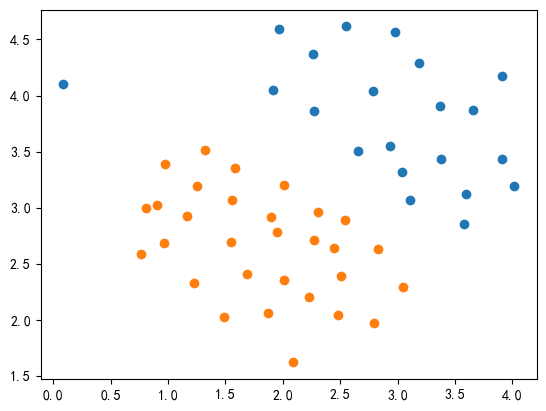

In [102]:
ax1 = []
ay1 = []
ax2 = []
ay2 = []
for train in train_set:
    if train['L'] == 1:
        ax1.append(train['x'])
        ay1.append(train['y'])
    else:
        ax2.append(train['x'])
        ay2.append(train['y'])

plt.scatter(ax1, ay1)
plt.scatter(ax2, ay2)

In [103]:
mpl.rcParams['font.sans-serif'] = ['SimHei']
x = np.arange(0, 5, 0.1)
y = np.arange(1, 5, 0.1)
test_datas = [
    {"x": x[i], "y":y[j]}
    for i in range(50)
    for j in range(40)
]
for test in test_datas:
    print(test)

{'x': 0.0, 'y': 1.0}
{'x': 0.0, 'y': 1.1}
{'x': 0.0, 'y': 1.2000000000000002}
{'x': 0.0, 'y': 1.3000000000000003}
{'x': 0.0, 'y': 1.4000000000000004}
{'x': 0.0, 'y': 1.5000000000000004}
{'x': 0.0, 'y': 1.6000000000000005}
{'x': 0.0, 'y': 1.7000000000000006}
{'x': 0.0, 'y': 1.8000000000000007}
{'x': 0.0, 'y': 1.9000000000000008}
{'x': 0.0, 'y': 2.000000000000001}
{'x': 0.0, 'y': 2.100000000000001}
{'x': 0.0, 'y': 2.200000000000001}
{'x': 0.0, 'y': 2.300000000000001}
{'x': 0.0, 'y': 2.4000000000000012}
{'x': 0.0, 'y': 2.5000000000000013}
{'x': 0.0, 'y': 2.6000000000000014}
{'x': 0.0, 'y': 2.7000000000000015}
{'x': 0.0, 'y': 2.8000000000000016}
{'x': 0.0, 'y': 2.9000000000000017}
{'x': 0.0, 'y': 3.0000000000000018}
{'x': 0.0, 'y': 3.100000000000002}
{'x': 0.0, 'y': 3.200000000000002}
{'x': 0.0, 'y': 3.300000000000002}
{'x': 0.0, 'y': 3.400000000000002}
{'x': 0.0, 'y': 3.500000000000002}
{'x': 0.0, 'y': 3.6000000000000023}
{'x': 0.0, 'y': 3.7000000000000024}
{'x': 0.0, 'y': 3.8000000000000

In [104]:
def distance(d1, d2):
    res = 0
    for key in ("x", "y"):
        res += (float(d1[key])-float(d2[key]))**2
    return res**0.5


alpha_0 = 0.95
def func1(d, gamma_q):
    return alpha_0 * exp(-gamma_q * d)


k = 9
gamma_q_1 = 1
gamma_q_2 = 1
def knn(data, set):
    # 1.距离
    res = [
        {"result": train['L'], "distance":distance(data, train)}
        for train in set
    ]
    # 2.升序排序
    res = sorted(res, key=lambda item:item['distance'])
    # 3.取前k个
    res2 = res[0:k]
    # 4.加权平均
    result = {"1": 0, "0": 0}
    res3 = [
        {"result": r['result'], "alpha": r['distance']}
        for r in res2
    ]
    for r in res3:
        if r['result'] == '1':
            r['alpha'] = func1(r['alpha'], 4*gamma_q_1)
        else:
            r['alpha'] = func1(r['alpha'], 4*gamma_q_2)
    # print(res3)
    res_1 = []
    res_2 = []
    for r in res3:
        if r['result'] == '1':
            res_1.append(r)
        else:
            res_2.append(r)
    # print(res_1, res_2)
    a_1 = 1
    a_2 = 1
    for r in res_1:
        a_1 *= 1 - r['alpha']
    for r in res_2:
        a_2 *= 1 - r['alpha']
    ka = a_1 + a_2 - a_1 * a_2
    m_1 = (1 - a_1) * a_2 / ka
    m_2 = (1 - a_2) * a_1 / ka
    if m_1 >= m_2:
        m = m_1
    else:
        m = m_2
    return m

In [105]:
train_set_1 = [
    {"x": r['x'], "y": r['y'], "L": r['L']}
    for r in train_set
    if r['L'] == 1
]
train_set_2 = [
    {"x": r['x'], "y": r['y'], "L": r['L']}
    for r in train_set
    if r['L'] == 0
]
for train in train_set_1:
    print(train)
print('----------------------------------------')
for train in train_set_2:
    print(train)

{'x': 1.9643, 'y': 4.5957, 'L': 1}
{'x': 2.2753, 'y': 3.8589, 'L': 1}
{'x': 2.9781, 'y': 4.5651, 'L': 1}
{'x': 2.932, 'y': 3.5519, 'L': 1}
{'x': 3.5772, 'y': 2.856, 'L': 1}
{'x': 4.015, 'y': 3.1937, 'L': 1}
{'x': 3.3814, 'y': 3.4291, 'L': 1}
{'x': 3.9113, 'y': 4.1761, 'L': 1}
{'x': 2.7822, 'y': 4.0431, 'L': 1}
{'x': 2.5518, 'y': 4.6162, 'L': 1}
{'x': 3.3698, 'y': 3.9101, 'L': 1}
{'x': 3.1048, 'y': 3.0709, 'L': 1}
{'x': 1.9182, 'y': 4.0534, 'L': 1}
{'x': 2.2638, 'y': 4.3706, 'L': 1}
{'x': 2.6555, 'y': 3.5008, 'L': 1}
{'x': 3.1855, 'y': 4.2888, 'L': 1}
{'x': 3.6579, 'y': 3.8692, 'L': 1}
{'x': 3.9113, 'y': 3.4291, 'L': 1}
{'x': 3.6002, 'y': 3.1221, 'L': 1}
{'x': 3.0357, 'y': 3.3165, 'L': 1}
{'x': 0.086405, 'y': 4.1045, 'L': 1}
----------------------------------------
{'x': 1.5841, 'y': 3.3575, 'L': 0}
{'x': 2.0103, 'y': 3.2039, 'L': 0}
{'x': 1.9527, 'y': 2.7843, 'L': 0}
{'x': 2.2753, 'y': 2.7127, 'L': 0}
{'x': 2.3099, 'y': 2.9584, 'L': 0}
{'x': 2.8283, 'y': 2.6309, 'L': 0}
{'x': 3.0473, '

In [106]:
dist1 = 0
for d1 in train_set_1:
    for d2 in train_set_1:
        dist1 += distance(d1, d2)
gamma_q_1 = (len(train_set_1) - 1) * len(train_set_1) / dist1
dist2 = 0
for d1 in train_set_2:
    for d2 in train_set_2:
        dist2 += distance(d1, d2)
gamma_q_2 = (len(train_set_2) - 1) * len(train_set_2) / dist2
print("gamma_q_1=", gamma_q_1, "gamma_q_2=", gamma_q_2)

gamma_q_1= 0.7939102580671775 gamma_q_2= 0.9801268147397062


In [107]:
ms = []
for data in test_datas:
    m = knn(data, train_set)
    ms.append(m)
print(ms)

[0.003922978121412402, 0.005221356376756248, 0.00696188388889496, 0.009249626204090757, 0.012211907130992739, 0.01601238544995387, 0.02089979645465656, 0.02703437227274441, 0.03460280747385925, 0.04374924544090586, 0.05468927144601843, 0.06729943315279686, 0.08136105768746227, 0.09614832361943816, 0.11074349118071303, 0.12409437067852624, 0.13573554581196512, 0.1448247732639576, 0.15068684790022235, 0.15335099900584837, 0.15326304068232333, 0.15220270556699492, 0.1508469843511877, 0.15108789138638556, 0.15572286886653708, 0.16844230254326154, 0.19412408014124952, 0.23926066193452425, 0.3123276836934209, 0.4229925735523978, 0.5728639100412539, 0.6850343064986215, 0.5818270651892059, 0.4198659986329986, 0.2923400412412355, 0.20128538940554352, 0.1379876773559372, 0.0943897354922203, 0.06449935207173862, 0.04405943325769057, 0.004998521653261868, 0.006679427145180772, 0.008890245871823077, 0.011876436382409983, 0.015769703550817082, 0.020803032233146834, 0.027291208494434227, 0.0355745001

In [108]:
ms = np.mat(ms)
xi = np.linspace((min(x)), (max(x)), 50)
yi = np.linspace((min(y)), (max(y)), 40)
xi, yi = np.meshgrid(xi, yi)  # 网格化
zi = ms.reshape((50, 40)).T
print(xi)
print(yi)
print(zi)

[[0.  0.1 0.2 ... 4.7 4.8 4.9]
 [0.  0.1 0.2 ... 4.7 4.8 4.9]
 [0.  0.1 0.2 ... 4.7 4.8 4.9]
 ...
 [0.  0.1 0.2 ... 4.7 4.8 4.9]
 [0.  0.1 0.2 ... 4.7 4.8 4.9]
 [0.  0.1 0.2 ... 4.7 4.8 4.9]]
[[1.  1.  1.  ... 1.  1.  1. ]
 [1.1 1.1 1.1 ... 1.1 1.1 1.1]
 [1.2 1.2 1.2 ... 1.2 1.2 1.2]
 ...
 [4.7 4.7 4.7 ... 4.7 4.7 4.7]
 [4.8 4.8 4.8 ... 4.8 4.8 4.8]
 [4.9 4.9 4.9 ... 4.9 4.9 4.9]]
[[0.00392298 0.00499852 0.00632554 ... 0.00106116 0.00081584 0.0006274 ]
 [0.00522136 0.00667943 0.00848332 ... 0.00138686 0.00106769 0.00082011]
 [0.00696188 0.00889025 0.01132895 ... 0.00181205 0.00139389 0.0010696 ]
 ...
 [0.09438974 0.09787739 0.09583357 ... 0.03853886 0.02815818 0.02039987]
 [0.06449935 0.06679103 0.06593222 ... 0.03059247 0.02261508 0.01655626]
 [0.04405943 0.04560728 0.04533822 ... 0.02386827 0.01785345 0.01321269]]


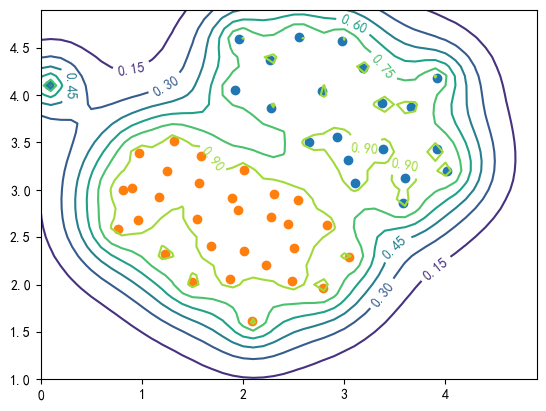

In [109]:
plt.scatter(ax1, ay1)
plt.scatter(ax2, ay2)
c1 = plt.contour(xi, yi, zi)
plt.clabel(c1, inline=True, fontsize=10)
plt.show()